In [1]:
from commonfunctions import *

from scipy.signal import convolve

import segmentation
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import cv2
import matplotlib.pyplot as plt
import os 
from skimage.measure import find_contours
from skimage.color import rgb2gray , rgba2rgb
from skimage.transform import resize
from PIL import Image
import sys
import random
from sklearn.model_selection import train_test_split
# import sklearn.datasets.images as loader
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
from notes import getNoteCharacter
# import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2
import os
import random
import pickle
import argparse
import datetime

In [2]:
# load the classfier
file = open("nn2.pickle",'rb')
nn = pickle.load(file)

# classifier options
target_img_size = (32, 32) # fix image size because|> classification algorithms THAT WE WILL USE HERE expect that

# We are going to fix the random seed to make our experiments reproducible 
# since some algorithms use pseudorandom generators
random_seed = 42  
random.seed(random_seed)
np.random.seed(random_seed)


classes = ['a_1', 'a_16', 'a_2', 'a_32', 'a_4', 'a_8', 
           'barline ', 'chord', 'clef', '.', '&&', '##', '&', '', '#', '\meter<"4/2"> ', '\meter<"4/4"> ']

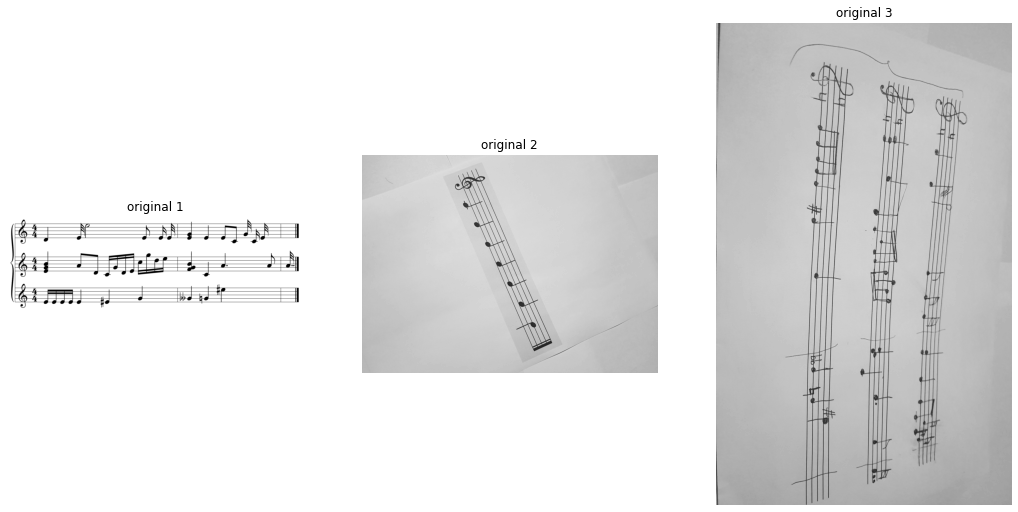

In [3]:
path1 = "02.png"
path2 = "27.jpg"
path3 = "13.jpg"
img1 = cv2.imread(path1,0) 
img2 = cv2.imread(path2,0)
img3 = cv2.imread(path3,0)
show_images([img1,img2,img3],["original 1", "original 2", "original 3"])

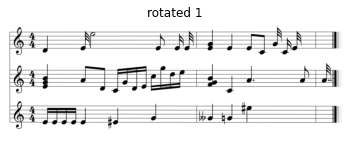

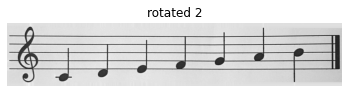

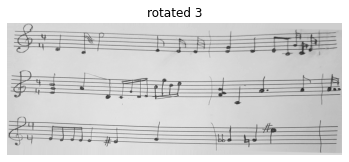

In [4]:
rotated1 = rotateImage(img1)
rotated2 = rotateImage(img2)
rotated3 = rotateImage(img3)
show_images([rotated1],["rotated 1"])
show_images([rotated2],["rotated 2"])
show_images([rotated3],["rotated 3"])

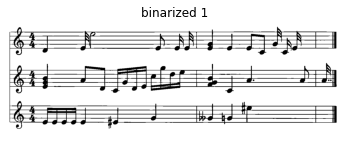

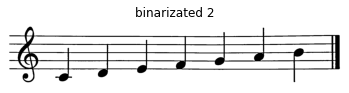

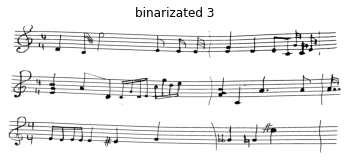

In [5]:
binariazed1 = binraization(rotated1)//255
binariazed2 = binraization(rotated2)//255
binariazed3 = binraization(rotated3)//255
show_images([binariazed1],["binarized 1"])
show_images([binariazed2],["binarizated 2"])
show_images([binariazed3],["binarizated 3"])

In [6]:
staffHeight1, spaceHeight1 = getRefLengths(binariazed1)
staffHeight2, spaceHeight2 = getRefLengths(binariazed2)
staffHeight3, spaceHeight3 = getRefLengths(binariazed3)
print("staff height : {} , space height : {} for the first image".format(staffHeight1, spaceHeight1))
print("staff height : {} , space height : {} for the second image".format(staffHeight2, spaceHeight2))
print("staff height : {} , space height : {} for the third image".format(staffHeight3, spaceHeight3))

staff height : 3 , space height : 16 for the first image
staff height : 5 , space height : 43 for the second image
staff height : 5 , space height : 36 for the third image


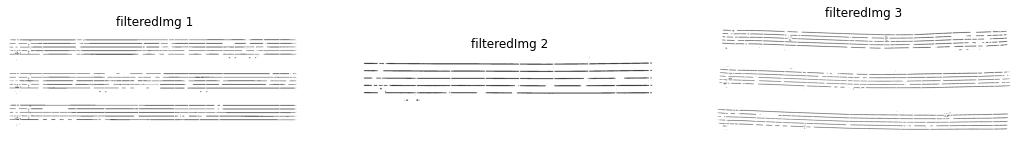

In [7]:
filteredImg1, candidates1 = getCandidateStaffs(binariazed1, staffHeight1)
filteredImg2, candidates2 = getCandidateStaffs(binariazed2, staffHeight2)
filteredImg3, candidates3 = getCandidateStaffs(binariazed3, staffHeight3)
filteredImg1, candidates1, eliminated1 = removeLonelyStaffs(candidates1, binariazed1, staffHeight1, spaceHeight1, eliminated=[])
filteredImg2, candidates2, eliminated2 = removeLonelyStaffs(candidates2, binariazed2, staffHeight2, spaceHeight2, eliminated=[])
filteredImg3, candidates3, eliminated3 = removeLonelyStaffs(candidates3, binariazed3, staffHeight3, spaceHeight3, eliminated=[])
show_images([filteredImg1,filteredImg2, filteredImg3],["filteredImg 1","filteredImg 2", "filteredImg 3"])

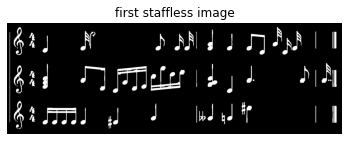

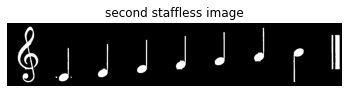

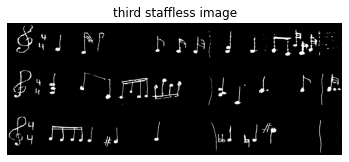

In [8]:
staffLess1 = (binariazed1-filteredImg1).astype(np.uint8)
staffLess2 = (binariazed2-filteredImg2).astype(np.uint8)
staffLess3 = (binariazed3-filteredImg3).astype(np.uint8)
show_images([staffLess1],["first staffless image"])
show_images([staffLess2],["second staffless image"])
show_images([staffLess3],["third staffless image"])

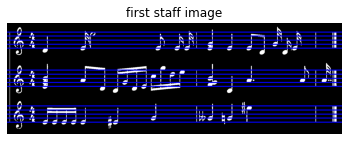

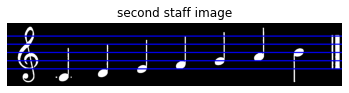

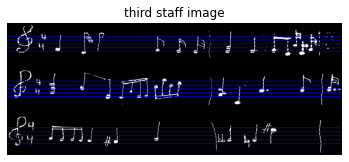

In [9]:
lines1 = getLines(1-filteredImg1, staffHeight1, spaceHeight1)
staff1 = cv2.cvtColor(staffLess1, cv2.COLOR_GRAY2BGR)
lines2 = getLines(1-filteredImg2, staffHeight2, spaceHeight2)
staff2 = cv2.cvtColor(staffLess2, cv2.COLOR_GRAY2BGR)
lines3 = getLines(1-filteredImg3, staffHeight3, spaceHeight3)
staff3 = cv2.cvtColor(staffLess3, cv2.COLOR_GRAY2BGR)

for line in lines1:
    cv2.line(staff1,(0,line), (staff1.shape[1]-1, line), (0,0,255), staffHeight1)
for line in lines2:
    cv2.line(staff2,(0,line), (staff2.shape[1]-1, line), (0,0,255), staffHeight2)
for line in lines3:
    cv2.line(staff3,(0,line), (staff3.shape[1]-1, line), (0,0,255), staffHeight3)

show_images([staff1],["first staff image"])
show_images([staff2],["second staff image"])
show_images([staff3],["third staff image"])

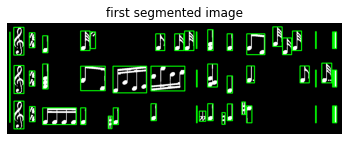

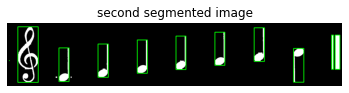

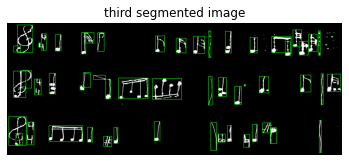

In [10]:
objects1 = segmentImage(staffLess1, lines1, staffHeight1, spaceHeight1)
objects2 = segmentImage(staffLess2, lines2, staffHeight2, spaceHeight2)
objects3 = segmentImage(staffLess3, lines3, staffHeight3, spaceHeight3)
cp1 = cv2.cvtColor(staffLess1, cv2.COLOR_GRAY2BGR)
cp2 = cv2.cvtColor(staffLess2, cv2.COLOR_GRAY2BGR)
cp3 = cv2.cvtColor(staffLess3, cv2.COLOR_GRAY2BGR)

for o in objects1:
    cv2.rectangle(cp1, (o[0],o[1]), (o[2],o[3]), (0, 255, 0), 3)
for o in objects2:
    cv2.rectangle(cp2, (o[0],o[1]), (o[2],o[3]), (0, 255, 0), 3)
for o in objects3:
    cv2.rectangle(cp3, (o[0],o[1]), (o[2],o[3]), (0, 255, 0), 3)

show_images([cp1],["first segmented image"])
show_images([cp2],["second segmented image"])
show_images([cp3],["third segmented image"])


In [11]:
firstTime = True
output = ""
perviousAccedental = ""
staffLess = staffLess1
spaceHeight =spaceHeight1
staffHeight  = staffHeight1
lines = lines1
for o in objects1:
    features = extract_hog_features(staffLess[o[1]:o[3], o[0]:o[2]],target_img_size)
    symbol_name = classes[np.argmax( nn.predict_proba([features]))]

#     show_images([staffLess[o[1]:o[3], o[0]:o[2]]])
    if symbol_name == "a_2" or symbol_name == "a_4":
        if isHalf(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight) :
            symbol_name = "a_2"
        else:
            symbol_name = "a_4"
    if symbol_name =="clef":
        if firstTime:
            firstTime = False
            output+= '['
        else:
            output+= '],\n['
    elif firstTime:
#         print('contin')
        continue 
    #beam
    elif (o[2]-o[0]) > 4*spaceHeight:
        try:
            output += getNoteCharacter(staffLess, o, "beam", lines, staffHeight, spaceHeight)+" "
        except:
            continue
    #dot and barline
    elif symbol_name == "." or symbol_name == "barline ":
            if isDot(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight):
                output += "."

    #chord
    elif symbol_name == "chord":
#             print("chord")
        try:
            notes = getchordText([o[1],o[3]],staffLess[o[1]:o[3], o[0]:o[2]],staffHeight,spaceHeight,lines)
        except:
            noteSymbol = getNoteCharacter(staffLess, o, "a_4", lines, staffHeight, spaceHeight)

            print(noteSymbol)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
#             print('contin')

            continue
        output +="{"
        for k in range(0,len(notes)-2,2):
            output += notes[k:k+2]+"/4,"
        output += notes[-2:]+"/4"
        output+= "} "

    #note
    elif symbol_name!="" and  symbol_name[0]=="a" :
        try:
            noteSymbol = getNoteCharacter(staffLess, o, symbol_name, lines, staffHeight, spaceHeight)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
        except:
#             print('contin')
            continue
    #accedentals
    elif symbol_name == '\meter<"4/2"> ' or symbol_name == '\meter<"4/4"> ':
        output += symbol_name
    else:

        perviousAccedental= symbol_name
output+="]"
if len(output.split("\n"))>1:
    output ="{\n"+output+"\n}"
print(output)



{
[\meter<"4/4"> d1/4 e1/32 e2/2 e1/8 e1/16 e1/32 {e1/4,g1/4} e1/4 e1/8 c1/8 g1/32 c1/16 e1/32 ],
[\meter<"4/4"> {b1/4,e1/4,g1/4} a1/8 d1/8 c1/16 g1/16 d1/16 e1/16 c2/16 g2/16 d2/16 e2/16 {b1/4,f1/4,g1/4} c1/4 a1/4. a1/8 a1/32.. ],
[\meter<"4/4"> e1/16 e1/16 e1/16 e1/16 e1/4 e#1/4 g1/4 g&&1/4 g1/4 e#2/4 ]
}


In [12]:
firstTime = True
output = ""
perviousAccedental = ""
staffLess = staffLess2
spaceHeight =spaceHeight2
staffHeight  = staffHeight2
lines = lines2
for o in objects2:
    features = extract_hog_features(staffLess[o[1]:o[3], o[0]:o[2]],target_img_size)
    symbol_name = classes[np.argmax( nn.predict_proba([features]))]

#     show_images([staffLess[o[1]:o[3], o[0]:o[2]]])
    if symbol_name == "a_2" or symbol_name == "a_4":
        if isHalf(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight) :
            symbol_name = "a_2"
        else:
            symbol_name = "a_4"
    if symbol_name =="clef":
        if firstTime:
            firstTime = False
            output+= '['
        else:
            output+= '],\n['
    elif firstTime:
#         print('contin')
        continue 
    #beam
    elif (o[2]-o[0]) > 4*spaceHeight:
        try:
            output += getNoteCharacter(staffLess, o, "beam", lines, staffHeight, spaceHeight)+" "
        except:
            continue
    #dot and barline
    elif symbol_name == "." or symbol_name == "barline ":
            if isDot(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight):
                output += "."

    #chord
    elif symbol_name == "chord":
#             print("chord")
        try:
            notes = getchordText([o[1],o[3]],staffLess[o[1]:o[3], o[0]:o[2]],staffHeight,spaceHeight,lines)
        except:
            noteSymbol = getNoteCharacter(staffLess, o, "a_4", lines, staffHeight, spaceHeight)

            print(noteSymbol)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
#             print('contin')

            continue
        output +="{"
        for k in range(0,len(notes)-2,2):
            output += notes[k:k+2]+"/4,"
        output += notes[-2:]+"/4"
        output+= "} "

    #note
    elif symbol_name!="" and  symbol_name[0]=="a" :
        try:
            noteSymbol = getNoteCharacter(staffLess, o, symbol_name, lines, staffHeight, spaceHeight)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
        except:
#             print('contin')

            continue
    #accedentals
    elif symbol_name == '\meter<"4/2"> ' or symbol_name == '\meter<"4/4"> ':
        output += symbol_name
    else:

        perviousAccedental= symbol_name
output+="]"
if len(output.split("\n"))>1:
    output ="{\n"+output+"\n}"
print(output)



[c1/4 d1/4 e1/4 f1/4 g1/4 a1/4 b1/4 ]


In [13]:
import warnings
warnings.filterwarnings("ignore", "Mean of empty slice")
np.seterr(all='ignore')

firstTime = True
output = ""
perviousAccedental = ""
staffLess = staffLess3
spaceHeight =spaceHeight3
staffHeight  = staffHeight3
lines = lines3
for o in objects3:
    features = extract_hog_features(staffLess[o[1]:o[3], o[0]:o[2]],target_img_size)
    symbol_name = classes[np.argmax( nn.predict_proba([features]))]

#     show_images([staffLess[o[1]:o[3], o[0]:o[2]]])
    if symbol_name == "a_2" or symbol_name == "a_4":
        if isHalf(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight) :
            symbol_name = "a_2"
        else:
            symbol_name = "a_4"
    if symbol_name =="clef":
        if firstTime:
            firstTime = False
            output+= '['
        else:
            output+= '],\n['
    elif firstTime:
#         print('contin')
        continue 
    #beam
    elif (o[2]-o[0]) > 4*spaceHeight:
        try:
            output += getNoteCharacter(staffLess, o, "beam", lines, staffHeight, spaceHeight)+" "
        except:
            continue
    #dot and barline
    elif symbol_name == "." or symbol_name == "barline ":
            if isDot(staffLess[o[1]:o[3], o[0]:o[2]],spaceHeight):
                output += "."

    #chord
    elif symbol_name == "chord":
#             print("chord")
        try:
            notes = getchordText([o[1],o[3]],staffLess[o[1]:o[3], o[0]:o[2]],staffHeight,spaceHeight,lines)
        except:
            noteSymbol = getNoteCharacter(staffLess, o, "a_4", lines, staffHeight, spaceHeight)

            print(noteSymbol)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
#             print('contin')

            continue
        output +="{"
        for k in range(0,len(notes)-2,2):
            output += notes[k:k+2]+"/4,"
        output += notes[-2:]+"/4"
        output+= "} "

    #note
    elif symbol_name!="" and  symbol_name[0]=="a" :
        try:
            noteSymbol = getNoteCharacter(staffLess, o, symbol_name, lines, staffHeight, spaceHeight)
            output += noteSymbol[0]+perviousAccedental+noteSymbol[1:]+" "
            perviousAccedental = ""
        except:
#             print('contin')

            continue
    #accedentals
    elif symbol_name == '\meter<"4/2"> ' or symbol_name == '\meter<"4/4"> ':
        output += symbol_name
    else:

        perviousAccedental= symbol_name
output+="]"
if len(output.split("\n"))>1:
    output ="{\n"+output+"\n}"
print(output)



{
[f2/4 f1/4 d1/4 g1/2 e1/16 g#1/4 e1/4. e1/8 c1/4 a1/32 d1/16 f1/32 ...],
[{d2/4,g1/4} a#2/2 e1/4 e1/16 f2/16 a1/16 e2/16 {a1/4,f1/4,g1/4} c1/4 d2/2 a1/8. b1/8 b1/32.. .],
[\meter<"4/4"> a1/16 g1/16 g1/16 f#1/4 f#1/4 g1/4 e&&2/4 g1/4 d#2/4 ]
}
